<a href="https://colab.research.google.com/github/jpmh1309/mp6134/blob/master/Copy_of_LTI_Filter_Design_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Digital Filter Design
During this class, we studied the following techniques for filter design:
1. FIR
  1. Window method
  2. Frequency Sampling
  3. Optimal Filters (Remez)
2. IIR
  1. Analog Filters
    1. Butterworth
    2. Chebyshev I
    3. Chebyshev II
    4. Elliptic (Cauer)
    5. Bessel
  2. Analog to Digital Transformation
    1. Derivative Approximation
    2. Equivalent Impulse response
    3. Adapted Z Transform
    4. Billinear 
  3. Frequency Transformation
    1. To low pass
    2. To high pass
    3. To band pass
    4. To band suppression
3. Second Order System Cascade

Note that this notebook only excercises the practical portion of the lecture. It must be complemented with the respective theory.

## Ideal Filters
This cells show the temporal aliasing caused by using ideal filters.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
F=np.array([1000, 2000, 3000, 4000])
Fs=16000
f=F/Fs

n = np.arange(50)
xa = []
x = np.zeros((1,len(n)))[0]

for i in range(4):
    xa.append(np.sin(2*np.pi*f[i]*n))
    x = np.add(x, xa[i])

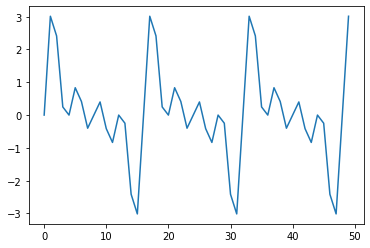

In [3]:
plt.plot(x)

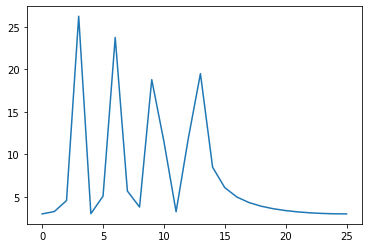

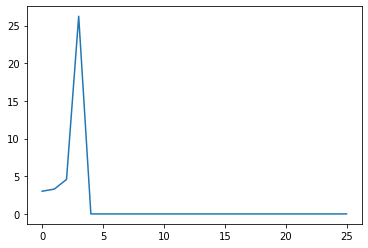

In [4]:
X = np.fft.rfft(x)

plt.plot (abs(X))
plt.show()
W = np.zeros((1,len(X)), dtype='complex64')[0]

fi=0
fe=4
W[fi:fe] = 1

XW = np.multiply(X,W)
plt.plot (abs(XW))

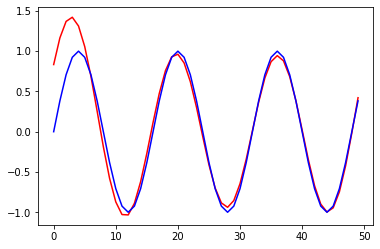

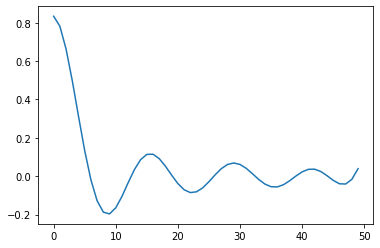

In [5]:
y2 = np.fft.irfft(XW)

plt.plot(y2, '-r')
plt.plot(xa[0], '-b')
plt.show()

err = y2 - xa[0]
plt.plot(err)

### Image Effect
Even though there is temporal aliasing in the signal above, it is not easy to see.

The following example performs the exact same processing to an image, and in the result a "ringing" effect can be seen.

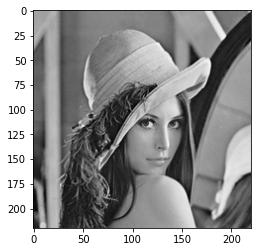

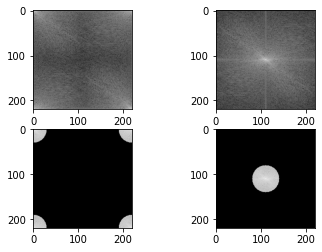

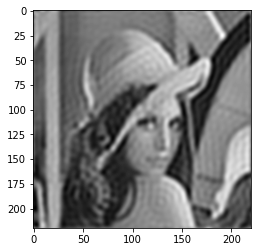

In [8]:
import cv2

i = cv2.imread('elena.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(i, cmap='gray')
plt.show()

I = np.fft.fft2(i)

W = np.zeros(I.shape)
r = 30
cv2.circle(W,(I.shape[0]//2,I.shape[1]//2),r,1,thickness=-1)

IW = np.multiply (I, np.fft.fftshift(W))

plt.subplot(221)
plt.imshow(np.log(abs(I) + 1e-6), cmap='gray')
plt.subplot(222)
plt.imshow(np.log(abs(np.fft.fftshift(I)) + 1e-6), cmap='gray')
plt.subplot(223)
plt.imshow(np.log(abs(IW) + 1e-6), cmap='gray')
plt.subplot(224)
plt.imshow(np.log(abs(np.fft.fftshift(IW)) + 1e-6), cmap='gray')
plt.show()

ii = np.real(np.fft.ifft2(IW))
plt.imshow(ii, cmap='gray')
plt.show()

## FIR Filter Design

### Window Method

Use the following function [firwin](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.firwin.html#scipy.signal.firwin) to filter the different frecuencies in the signal.

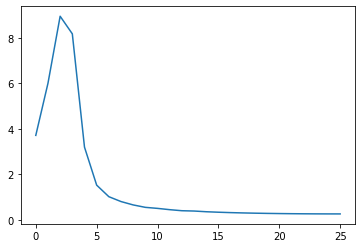

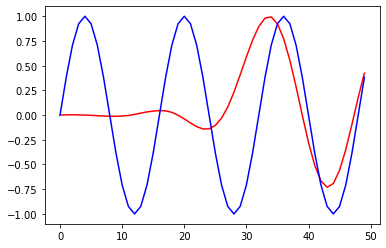

In [22]:
from scipy import signal
numtaps = 64
y3 = signal.lfilter(signal.firwin(numtaps, 1100, fs=Fs), 1.0, x)

plt.plot (abs(np.fft.rfft(y3)))
plt.show()

plt.plot(y3, '-r')
plt.plot(xa[0], '-b')



Use the [kaiser](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.kaiserord.html#scipy.signal.kaiserord) formula as an heuristic to estimate the required filter order

### Optimal Filter Design

Use the [remez](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.remez.html#scipy.signal.remez) method to compute an optimal filter.

## IIR Filter Design
### Analog Filters
Use the following methods combined with [freqs](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.freqs.html#scipy.signal.freqs) to create analog filters suitable for filtering the lowest frequences in our signal
* [buttord](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.buttord.html#scipy.signal.buttord) and [butter](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html#scipy.signal.butter)
* [cheb1ord](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.cheb1ord.html#scipy.signal.cheb1ord) and [cheby1](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.cheby1.html#scipy.signal.cheby1)
* [cheb2ord](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.cheb2ord.html) and [cheby2](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.cheby2.html)
* [ellipord](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.ellipord.html#scipy.signal.ellipord) and [ellip](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.ellip.html#scipy.signal.ellip)
* [bessel](#https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.bessel.html#scipy.signal.bessel)

### Analog to Digital Transformation

Use [cont2discrete](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.cont2discrete.html#scipy.signal.cont2discrete) to transform the previous filters into the digital domain. Make sure you explore:
* Derivative approximation
* Bilinear
* Equivalent impulse response
* Others?

## Frequency Transformation

Transform your analog filters for different purposes using:
* [low pass to band pass](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lp2bp.html)
* [low pass to band suppression](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lp2bs.html)
* [low pass to high pass](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lp2hp.html)
* [low pass to low pass](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lp2lp.html)

## Second Order Cascades

High order filters are ill-conditioned solutions and are highly affected by numerical problems. cascades of secod order filters present an alternative to this problem.

Use [sosfilt](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.sosfilt.html?highlight=sosfilter) along with [tf2sos](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.tf2sos.html?highlight=tf2sos#scipy.signal.tf2sos) to explore alternative implementations.

## Real Audio

Let's implement some filters on top of Piazzolla's Libertango played by Berlin's string quartet. You may refer to [this page](https://www.zytrax.com/tech/audio/audio.html) for some guide on the bandwidth of the different instruments.


In [ ]:
import librosa as lr
import librosa.display
#import sounddevice as sd

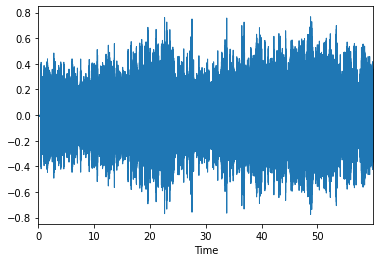

In [ ]:
x, fs = lr.core.load ('libertango.wav')
x = lr.core.to_mono (x)

seconds = 60
x = x[0:fs*seconds]

lr.display.waveplot(x, fs)